In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib


data = pd.read_csv(r"./data_train.csv")
x_columns = []
for x in data.columns:
    if x not in ['id', 'label']:
        x_columns.append(x)
X = data[x_columns]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y)

# 模型训练，使用GBDT算法
gbr = GradientBoostingClassifier(n_estimators=3000, max_depth=2, min_samples_split=2, learning_rate=0.1)
gbr.fit(x_train, y_train.ravel())
joblib.dump(gbr, 'train_model_result4.m')   # 保存模型

y_gbr = gbr.predict(x_train)
y_gbr1 = gbr.predict(x_test)
acc_train = gbr.score(x_train, y_train)
acc_test = gbr.score(x_test, y_test)
print(acc_train)
print(acc_test)

/home/zqgu/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


1.0
0.999953216374269


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib


data = pd.read_csv(r"./data_train.csv")
print(data.shape)

(85500, 8)


#### 特征重要性

In [3]:
print(data.head())
print()
x_data = data.iloc[:,0:-1]
print(x_data.head())

print(x_data.shape)

   id   K1K2驱动信号    电子锁驱动信号      急停信号       门禁信号     THDV-M      THDI-M  label
0   1  11.802741  12.122681 -0.057440  12.089629  11.809618   11.468398      1
1   2  11.818357  12.135362 -0.055879  12.056373  11.671259   38.840074      1
2   3  11.802741  12.121097 -0.060561  12.038968  12.163057   14.761536      1
3   4  11.844897  12.157545 -0.094915  12.059551  10.682868   16.772367      1
4   5  11.818357  12.121097 -0.087113  12.054791   9.838321  141.752642      1

   id   K1K2驱动信号    电子锁驱动信号      急停信号       门禁信号     THDV-M      THDI-M
0   1  11.802741  12.122681 -0.057440  12.089629  11.809618   11.468398
1   2  11.818357  12.135362 -0.055879  12.056373  11.671259   38.840074
2   3  11.802741  12.121097 -0.060561  12.038968  12.163057   14.761536
3   4  11.844897  12.157545 -0.094915  12.059551  10.682868   16.772367
4   5  11.818357  12.121097 -0.087113  12.054791   9.838321  141.752642
(85500, 7)


In [4]:
import matplotlib.pyplot as plt

K1K2驱动信号    0.034979
电子锁驱动信号     0.020196
急停信号        0.020362
门禁信号        0.083536
THDV-M      0.836974
THDI-M      0.003952
dtype: float64
THDI-M      0.003952
电子锁驱动信号     0.020196
急停信号        0.020362
K1K2驱动信号    0.034979
门禁信号        0.083536
THDV-M      0.836974
dtype: float64
['THDI-M', '电子锁驱动信号', '急停信号', 'K1K2驱动信号', '门禁信号', 'THDV-M']
[0.00395219 0.02019622 0.02036213 0.03497919 0.08353629 0.83697399]


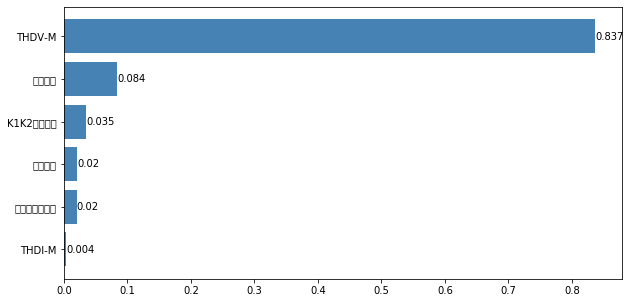

In [21]:
importance = gbr.feature_importances_
Impt_Series = pd.Series(importance, index = x_train.columns)
print(Impt_Series)



# Impt_Series.sort_values(ascending = True).plot('barh')
Impt_Series = Impt_Series.sort_values(ascending = True)

print(Impt_Series)
print(list(Impt_Series.index))
Y = list(Impt_Series.index)
# 绘制条形图
plt.figure(figsize=(10,5)) 
plt.barh(range(len(Y)), # 指定条形图y轴的刻度值
        Impt_Series.values, # 指定条形图x轴的数值
        tick_label = Y, # 指定条形图y轴的刻度标签
        color = 'steelblue', # 指定条形图的填充色
       )

print(Impt_Series.values)
# print()
for y,x in enumerate(Impt_Series.values):
    plt.text(x+0.0001,y,'%s' %round(x,3),va='center')
plt.show()